In [43]:
import numpy as np
import pandas as pd
import string
import re
from IPython.core.display import HTML

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# # Preprocesado y modelado
# from sklearn import svm # clasificador support vector machines
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix
# import nltk # natural lenguaje tool kit para procesamiento de lenguaje natural

# # cambiador de formatos para factorizar un dataset
# from sklearn.feature_extraction.text import TfidfVectorizer 

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [45]:
from nltk.corpus import stopwords
spanish_stopwords = list(stopwords.words('spanish'))
spanish_stopwords.extend(("xq", "oye", "dale", "dele", "ba", "abc", "nan", "na", "todo bien"))
print(spanish_stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [46]:
ruta = 'Opiniones.csv'
data = pd.read_csv(ruta)
# print(data.head())

In [47]:
data.rename(columns={'AÑO':'YEAR'}, inplace=True)
print(data.head())

     YEAR    SEDE    FACULTAD          CARRERA OBSERVACIONES
0  2019.0  SEDE 2  FACULTAD 1  LICENCIATURA 03             0
1  2019.0  SEDE 2  FACULTAD 1  LICENCIATURA 04             0
2  2019.0  SEDE 2  FACULTAD 2  LICENCIATURA 07             0
3  2019.0  SEDE 2  FACULTAD 3    INGENIERIA 15             0
4  2019.0  SEDE 3  FACULTAD 1  LICENCIATURA 04             0


In [48]:
def limpiar_tokenizar(texto):
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', texto)
    # Se convierte todo el texto a minúsculas
    nuevo_texto = nuevo_texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\
    \-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~—]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 2]
    # quitar los token que sean solamente de una letra repetidas 2 o mas veces
    nuevo_texto = [token for token in nuevo_texto if not re.fullmatch(r'(.)\1*', token)]
    
    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining zzzzz oooooo aaaaaaaa hhh eeeeeeee todo bien, bien"
print(test)
print(limpiar_tokenizar(texto=test))

Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining zzzzz oooooo aaaaaaaa hhh eeeeeeee todo bien, bien
['esto', 'ejemplo', 'limpieza', 'texto', 'cienciadedatos', 'textmining', 'todo', 'bien', 'bien']


In [49]:
print(data['FACULTAD'].value_counts())
print("______________________________________________________________________")
print(string.punctuation)
print(re.escape(string.punctuation))
print("______________________________________________________________________")
data['OBSERVACIONES'] = data['OBSERVACIONES'].astype(str)
data['TEXTO_TOKEN'] = data['OBSERVACIONES'].apply(lambda x: limpiar_tokenizar(x))
# Selecciona una cantidad aleatoria de filas
random_data = data.sample(20)


# Muestra las filas seleccionadas como una tabla HTML
display(HTML(random_data.to_html()))


FACULTAD
FACULTAD 3    13765
FACULTAD 1    12296
FACULTAD 5    11577
FACULTAD 4     7266
FACULTAD 2     5828
FACULTAD 6     1787
Name: count, dtype: int64
______________________________________________________________________
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
______________________________________________________________________


,YEAR,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN
6619,2019.0,SEDE 6,FACULTAD 2,INGENIERIA 08,Ampliar el área de la cafetería,"[ampliar, área, cafetería]"
17455,2019.0,SEDE 1,FACULTAD 1,LICENCIATURA 02,Estacionamientos llenos,"[estacionamientos, llenos]"
8342,2019.0,SEDE 1,FACULTAD 5,LICENCIATURA 21,bien,[bien]
35428,2019.0,SEDE 1,FACULTAD 2,INGENIERIA 08,Mejorar los beneficios de tener un indice mayor a 2.0,"[mejorar, los, beneficios, tener, indice, mayor]"
40681,2019.0,SEDE 8,FACULTAD 1,LICENCIATURA 04,No hay,[hay]
31420,2019.0,SEDE 1,FACULTAD 1,POSTGRADO 31,Mejora en el servicio de deudas,"[mejora, servicio, deudas]"
42638,2019.0,SEDE 5,FACULTAD 5,LICENCIATURA 22,Null,[null]
2950,2019.0,SEDE 1,FACULTAD 2,INGENIERIA 08,.,[]
19387,2019.0,SEDE 1,FACULTAD 3,INGENIERIA 15,Hace mucho calor en algunos salones,"[hace, mucho, calor, algunos, salones]"
40346,2019.0,SEDE 1,FACULTAD 4,LICENCIATURA 15,No,[]


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           52519 non-null  float64
 1   SEDE           52519 non-null  object 
 2   FACULTAD       52519 non-null  object 
 3   CARRERA        52338 non-null  object 
 4   OBSERVACIONES  52583 non-null  object 
 5   TEXTO_TOKEN    52583 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.4+ MB


In [51]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52338 entries, 0 to 52518
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           52338 non-null  float64
 1   SEDE           52338 non-null  object 
 2   FACULTAD       52338 non-null  object 
 3   CARRERA        52338 non-null  object 
 4   OBSERVACIONES  52338 non-null  object 
 5   TEXTO_TOKEN    52338 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.8+ MB


In [52]:
data['YEAR'] = data['YEAR'].astype(float).astype(int)
col_list = ['YEAR','SEDE', 'FACULTAD', 'CARRERA']
for col in col_list:
    if col == 'TEXTO_TOKEN':
        data[col] = data[col].apply(lambda x: ' '.join(x))
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna YEAR: 1 subniveles
Columna SEDE: 8 subniveles
Columna FACULTAD: 6 subniveles
Columna CARRERA: 103 subniveles


In [53]:
data.drop(columns='YEAR', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52338 entries, 0 to 52518
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SEDE           52338 non-null  object
 1   FACULTAD       52338 non-null  object
 2   CARRERA        52338 non-null  object
 3   OBSERVACIONES  52338 non-null  object
 4   TEXTO_TOKEN    52338 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


In [54]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data['TEXTO_TOKEN'] = data['TEXTO_TOKEN'].apply(tuple)
data.drop_duplicates(inplace=True)
data['TEXTO_TOKEN'] = data['TEXTO_TOKEN'].apply(list)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (52338, 5)


Tamaño del set después de eliminar las filas repetidas: (44733, 5)


In [55]:
display(HTML(data.sample(10).to_html()))

,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN
39650,SEDE 1,FACULTAD 3,POSTGRADO 38,ninguna,[ninguna]
4611,SEDE 2,FACULTAD 5,LICENCIATURA 22,...,[]
23679,SEDE 7,FACULTAD 1,LICENCIATURA 02,La verdad estoy sastifecho,"[verdad, estoy, sastifecho]"
45285,SEDE 1,FACULTAD 1,LICENCIATURA 03,Que en la biblioteca tengan todas las normas escritas en grande en un cartel y las personas que atienden se las digan a los estudiantes.,"[que, biblioteca, tengan, todas, las, normas, escritas, grande, cartel, las, personas, que, atienden, las, digan, los, estudiantes]"
14988,SEDE 2,FACULTAD 2,INGENIERIA 08,El wifi debe funcionar mejor,"[wifi, debe, funcionar, mejor]"
52033,SEDE 1,FACULTAD 3,LICENCIATURA 11,WIFI demasiado lento,"[wifi, demasiado, lento]"
46221,SEDE 1,FACULTAD 5,LICENCIATURA 27,"reparación del ascensor del ----, para agilizar movimientos","[reparación, del, ascensor, del, para, agilizar, movimientos]"
10841,SEDE 1,FACULTAD 1,INGENIERIA 01,Considerar en el futuro un edi----o para estacionamientos,"[considerar, futuro, edi, para, estacionamientos]"
20501,SEDE 1,FACULTAD 5,INGENIERIA 23,Impresiones,[impresiones]
40732,SEDE 2,FACULTAD 2,INGENIERIA 08,No hay buen material para los laboratorios,"[hay, buen, material, para, los, laboratorios]"


In [56]:
data = data[data['TEXTO_TOKEN'].apply(len) > 0]
print(f'Tamaño del set después de eliminar las filas sin tokens: {data.shape}')
display(HTML(data.head(10).to_html()))

Tamaño del set después de eliminar las filas sin tokens: (42290, 5)


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,"- Capacidad, iluminación, ventilación de las aulas. El aire se suele dañar Los salones se ven muy oscuros, en mi opinión no motivan a dar clase ahí. - Servicios de Fotocopiado. Se necesita urgente.","[capacidad, iluminación, ventilación, las, aulas, aire, suele, dañar, los, salones, ven, muy, oscuros, opinión, motivan, dar, clase, ahí, servicios, fotocopiado, necesita, urgente]"
879,SEDE 8,FACULTAD 4,LICENCIATURA 15,---- de reciclado,[reciclado]
880,SEDE 1,FACULTAD 5,INGENIERIA 25,deberían modernizar los equipos utilizados en los laboratorios.,"[deberían, modernizar, los, equipos, utilizados, los, laboratorios]"
881,SEDE 1,FACULTAD 4,INGENIERIA 17,"---- en necesidad del remodelación interior, abrir mas entradas de estacionamientos (hay una que se construyo pero esta cerrada), mas puentes peatonales y reparar los artefactos de los baños.","[necesidad, del, remodelación, interior, abrir, mas, entradas, estacionamientos, hay, una, que, construyo, pero, esta, cerrada, mas, puentes, peatonales, reparar, los, artefactos, los, baños]"
882,SEDE 1,FACULTAD 1,INGENIERIA 01,---- necesita cortinas para uso de proyectores,"[necesita, cortinas, para, uso, proyectores]"
883,SEDE 8,FACULTAD 1,INGENIERIA 01,no contamos con servicio de fotocopia. El Wi-Fi no llega a ciertas aulas en donde muchas veces se necesita para trabajos que nos asignan.,"[contamos, con, servicio, fotocopia, llega, ciertas, aulas, donde, muchas, veces, necesita, para, trabajos, que, nos, asignan]"
884,SEDE 1,FACULTAD 5,LICENCIATURA 27,---- no tiene un buen olor,"[tiene, buen, olor]"
885,SEDE 8,FACULTAD 3,INGENIERIA 15,"WiFi no es suficiente, implementar un WiFi con mayor capacidad de banda ancha y mayores velocidades sería oportuno.","[wifi, suficiente, implementar, wifi, con, mayor, capacidad, banda, ancha, mayores, velocidades, sería, oportuno]"
893,SEDE 1,FACULTAD 2,TÉCNICO 05,#14 / pocas charlas o seminarios de innovación de información enfocado para el grupo nocturno,"[pocas, charlas, seminarios, innovación, información, enfocado, para, grupo, nocturno]"
894,SEDE 1,FACULTAD 2,POSTGRADO 20,#14 Informar sobre Servicios de Orientación para el horario estudiantil nocturno.,"[informar, sobre, servicios, orientación, para, horario, estudiantil, nocturno]"


In [57]:
Data_tidy = data.explode(column='TEXTO_TOKEN')
Data_tidy = Data_tidy.drop(columns='OBSERVACIONES')
Data_tidy = Data_tidy.rename(columns={'TEXTO_TOKEN':'TOKEN'})
display(HTML(Data_tidy.head(5).to_html()))

,SEDE,FACULTAD,CARRERA,TOKEN
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,capacidad
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,iluminación
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,ventilación
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,las
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,aulas


In [58]:
print('--------------------------')
print('Palabras totales por FACULTAD')
print('--------------------------')
Data_tidy.groupby(by='FACULTAD')['TOKEN'].count()

--------------------------
Palabras totales por FACULTAD
--------------------------


FACULTAD
FACULTAD 1    53471
FACULTAD 2    25651
FACULTAD 3    59853
FACULTAD 4    29910
FACULTAD 5    55217
FACULTAD 6     8438
Name: TOKEN, dtype: int64

In [59]:
print('--------------------------')
print('Palabras totales por SEDE')
print('--------------------------')
Data_tidy.groupby(by='SEDE')['TOKEN'].count()

--------------------------
Palabras totales por SEDE
--------------------------


SEDE
SEDE 1    153196
SEDE 2      8784
SEDE 3      2662
SEDE 4      9119
SEDE 5      5490
SEDE 6     22881
SEDE 7     18183
SEDE 8     12225
Name: TOKEN, dtype: int64

In [60]:
print('----------------------------')
print('Palabras distintas por FACULTAD')
print('----------------------------')
Data_tidy.groupby(by='FACULTAD')['TOKEN'].nunique()

----------------------------
Palabras distintas por FACULTAD
----------------------------


FACULTAD
FACULTAD 1    5352
FACULTAD 2    3788
FACULTAD 3    5749
FACULTAD 4    4073
FACULTAD 5    5752
FACULTAD 6    2031
Name: TOKEN, dtype: int64

In [61]:
print('----------------------------')
print('Palabras distintas por SEDE')
print('----------------------------')
Data_tidy.groupby(by='SEDE')['TOKEN'].nunique()

----------------------------
Palabras distintas por SEDE
----------------------------


SEDE
SEDE 1    9892
SEDE 2    1807
SEDE 3     897
SEDE 4    1687
SEDE 5    1326
SEDE 6    3212
SEDE 7    2971
SEDE 8    2246
Name: TOKEN, dtype: int64

In [62]:
temp_df = pd.DataFrame(Data_tidy.groupby(by = ["SEDE","CARRERA", "FACULTAD"])["TOKEN"].count())
temp_df.reset_index().groupby("SEDE")["TOKEN"].agg(['mean', 'std'])


,mean,std
SEDE,,
SEDE 1,1579.340206,2128.664061
SEDE 2,283.354839,260.507140
SEDE 3,166.375000,162.540200
SEDE 4,569.937500,377.361801
SEDE 5,261.428571,304.484412
SEDE 6,586.692308,693.429773
SEDE 7,627.000000,639.995201
SEDE 8,370.454545,445.629126


In [63]:
temp_df.reset_index().groupby("FACULTAD")["TOKEN"].agg(['mean', 'std'])

,mean,std
FACULTAD,,
FACULTAD 1,848.746032,1294.484715
FACULTAD 2,557.630435,1159.082575
FACULTAD 3,1050.052632,1780.900449
FACULTAD 4,636.382979,1028.017838
FACULTAD 5,1022.537037,1715.685316
FACULTAD 6,562.533333,802.686549


In [64]:
Data_tidy.groupby(['FACULTAD','TOKEN'])['TOKEN'] \
 .count() \
 .reset_index(name='count') \
 .groupby('FACULTAD') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

FACULTAD    TOKEN  count
FACULTAD                                    
FACULTAD 1 3119   FACULTAD 1      los   2031
           4159   FACULTAD 1      que   1544
           3680   FACULTAD 1     para   1378
           3253   FACULTAD 1  mejorar   1222
           2983   FACULTAD 1      las   1108
FACULTAD 2 7522   FACULTAD 2      los   1149
           8288   FACULTAD 2      que    703
           7960   FACULTAD 2     para    589
           7624   FACULTAD 2  mejorar    573
           7418   FACULTAD 2      las    518
FACULTAD 3 12466  FACULTAD 3      los   2449
           13581  FACULTAD 3      que   1769
           13093  FACULTAD 3     para   1435
           12316  FACULTAD 3      las   1278
           12601  FACULTAD 3  mejorar   1253
FACULTAD 4 17229  FACULTAD 4      los   1398
           18034  FACULTAD 4      que    771
           17690  FACULTAD 4     para    718
           17356  FACULTAD 4  mejorar    708
           17126  FACULTAD 4      las    575
FACULTAD 5 22203  FACULTAD 5      los   2172
           23370  FACULTAD 5      que   1859
           22070  FACULTAD 5      las   1171
           22858  FACULTAD 5     para   1153
           22352  FACULTAD 5  mejorar   1129
FACULTAD 6 25836  FACULTAD 6      los    268
           26260  FACULTAD 6      que    264
           26066  FACULTAD 6     para    212
           25781  FACULTAD 6      las    176
           25954  FACULTAD 6      más    168

In [65]:
Data_tidy.groupby(['SEDE','TOKEN'])['TOKEN'] \
 .count() \
 .reset_index(name='count') \
 .groupby('SEDE') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

SEDE      TOKEN  count
SEDE                                  
SEDE 1 5758   SEDE 1        los   5960
       7669   SEDE 1        que   4745
       6835   SEDE 1       para   3647
       5520   SEDE 1        las   3320
       6018   SEDE 1    mejorar   3224
SEDE 2 10902  SEDE 2        los    441
       10139  SEDE 2  cafetería    278
       10955  SEDE 2    mejorar    260
       11301  SEDE 2        que    232
       11133  SEDE 2       para    167
SEDE 3 12201  SEDE 3        los     85
       12396  SEDE 3        que     72
       12309  SEDE 3       para     59
       12257  SEDE 3        más     53
       12164  SEDE 3   internet     52
SEDE 4 13554  SEDE 4        los    431
       12823  SEDE 4  cafetería    230
       13892  SEDE 4        que    230
       13747  SEDE 4       para    195
       13603  SEDE 4    mejorar    193
SEDE 5 15026  SEDE 5        los    293
       15077  SEDE 5    mejorar    138
       15199  SEDE 5       para    133
       14992  SEDE 5        las    126
       14472  SEDE 5  cafetería    121
SEDE 6 17420  SEDE 6        los    960
       17789  SEDE 6       para    629
       18083  SEDE 6        que    608
       17335  SEDE 6        las    492
       17499  SEDE 6    mejorar    492
SEDE 7 20499  SEDE 7        los    782
       21115  SEDE 7        que    546
       20579  SEDE 7    mejorar    432
       20849  SEDE 7       para    370
       20681  SEDE 7        más    350
SEDE 8 23050  SEDE 8        los    515
       23525  SEDE 8        que    357
       23318  SEDE 8       para    285
       23109  SEDE 8    mejorar    249
       23174  SEDE 8        más    235

In [66]:
Data_tidy= Data_tidy[~(Data_tidy["TOKEN"].isin(spanish_stopwords))]
display(HTML(Data_tidy.head(10).to_html()))

,SEDE,FACULTAD,CARRERA,TOKEN
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,capacidad
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,iluminación
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,ventilación
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,aulas
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,aire
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,suele
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,dañar
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,salones
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,ven
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,oscuros


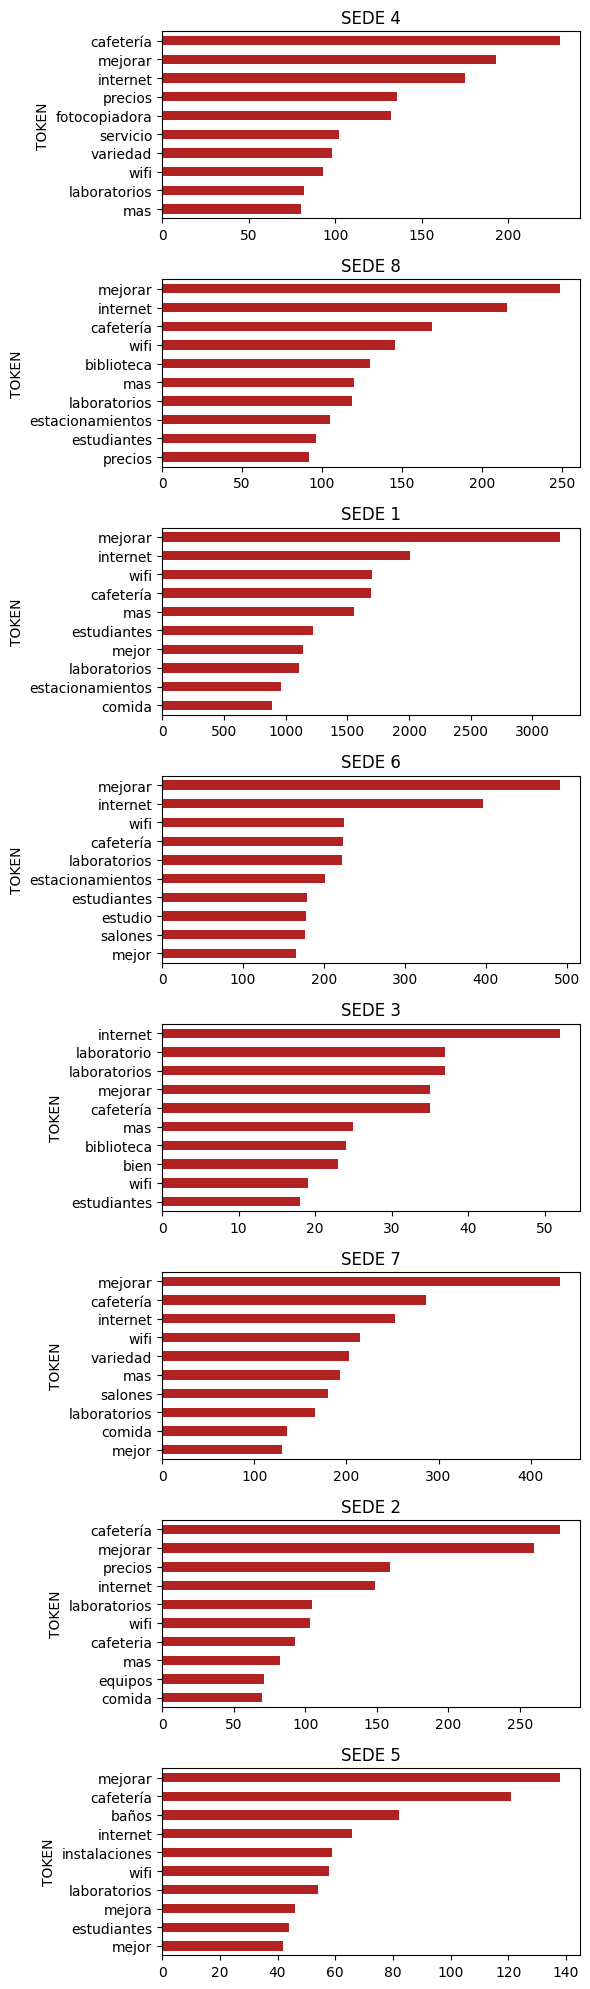

In [67]:
# Top 10 palabras por SEDE (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=8, ncols=1,figsize=(6, 20))
for i, SEDE in enumerate(Data_tidy.SEDE.unique()):
    df_temp = Data_tidy[Data_tidy.SEDE == SEDE]
    counts  = df_temp['TOKEN'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(SEDE)

fig.tight_layout()

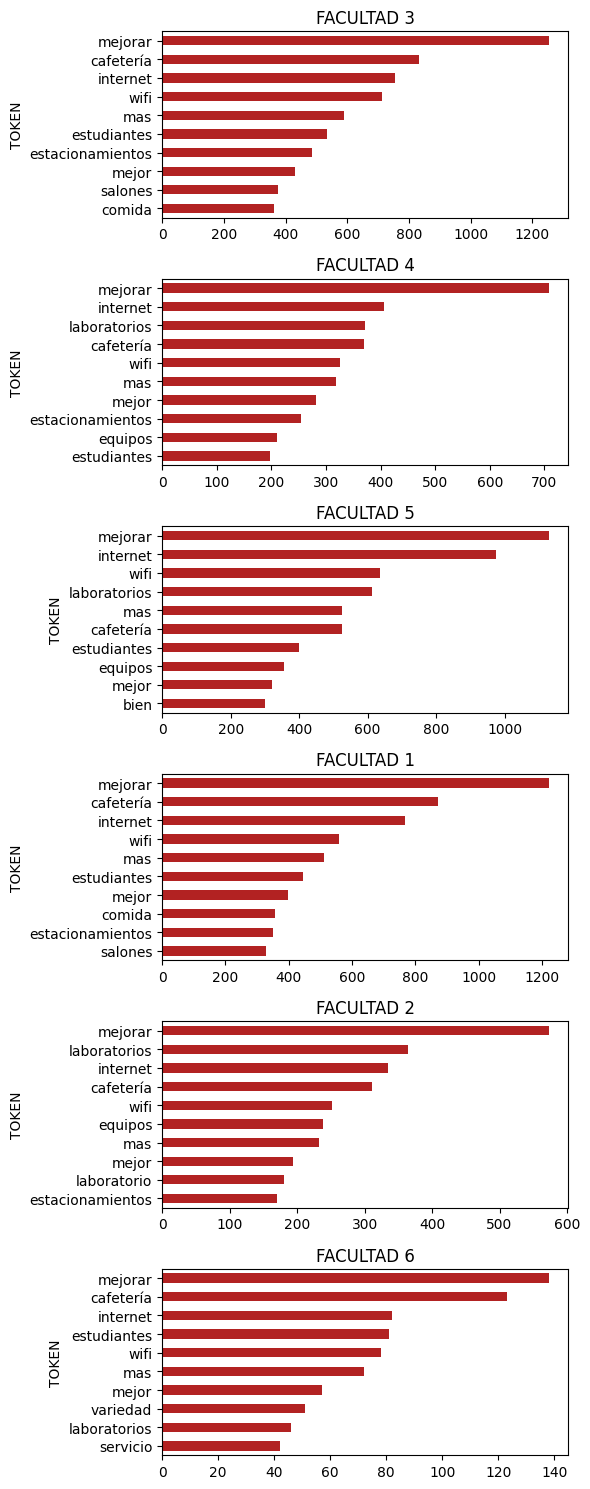

In [68]:
fig, axs = plt.subplots(nrows=6, ncols=1,figsize=(6, 15))
for i, FACU in enumerate(Data_tidy.FACULTAD.unique()):
    df_temp = Data_tidy[Data_tidy.FACULTAD == FACU]
    counts  = df_temp['TOKEN'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(FACU)

fig.tight_layout()

In [69]:
Data_pivot_Facu = Data_tidy.groupby(["FACULTAD","TOKEN"])["TOKEN"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "TOKEN" , columns="FACULTAD", values= "count")
Data_pivot_Facu.columns.name = None
pv_print=Data_pivot_Facu.sample(10)
display(HTML(pv_print.to_html()))

,FACULTAD 1,FACULTAD 2,FACULTAD 3,FACULTAD 4,FACULTAD 5,FACULTAD 6
TOKEN,,,,,,
colocaría,2.0,NaN,NaN,NaN,NaN,NaN
cede,1.0,2.0,2.0,1.0,3.0,NaN
accidente,6.0,NaN,2.0,NaN,2.0,NaN
azucar,1.0,NaN,NaN,NaN,NaN,NaN
oscuridad,NaN,1.0,NaN,NaN,2.0,NaN
sismos,NaN,NaN,NaN,NaN,1.0,NaN
expuestos,NaN,NaN,NaN,1.0,NaN,NaN
humanos,NaN,NaN,NaN,NaN,2.0,NaN
realizadas,2.0,1.0,1.0,1.0,2.0,1.0


In [70]:
Data_pivot_Sede = Data_tidy.groupby(["SEDE","TOKEN"])["TOKEN"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "TOKEN" , columns="SEDE", values= "count")
Data_pivot_Sede.columns.name = None
pv_print=Data_pivot_Sede.sample(10)
display(HTML(pv_print.to_html()))

,SEDE 1,SEDE 2,SEDE 3,SEDE 4,SEDE 5,SEDE 6,SEDE 7,SEDE 8
TOKEN,,,,,,,,
comenzaba,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrientes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estandares,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
palomas,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
moviles,4.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
reflejen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
atractivos,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ironía,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mostrarme,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [71]:
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia
display(HTML(Data_pivot_Facu.corr(method=similitud_coseno).to_html()))
display(HTML(Data_pivot_Sede.corr(method=similitud_coseno).to_html()))
# Data_pivot.corr(method=similitud_coseno)

,FACULTAD 1,FACULTAD 2,FACULTAD 3,FACULTAD 4,FACULTAD 5,FACULTAD 6
FACULTAD 1,1.000000,0.949116,0.983440,0.958127,0.946646,0.947079
FACULTAD 2,0.949116,1.000000,0.926783,0.977302,0.961079,0.900678
FACULTAD 3,0.983440,0.926783,1.000000,0.943897,0.935897,0.949146
FACULTAD 4,0.958127,0.977302,0.943897,1.000000,0.955539,0.914031
FACULTAD 5,0.946646,0.961079,0.935897,0.955539,1.000000,0.912757
FACULTAD 6,0.947079,0.900678,0.949146,0.914031,0.912757,1.000000


,SEDE 1,SEDE 2,SEDE 3,SEDE 4,SEDE 5,SEDE 6,SEDE 7,SEDE 8
SEDE 1,1.000000,0.866205,0.838777,0.831576,0.835988,0.920596,0.952154,0.917817
SEDE 2,0.866205,1.000000,0.813911,0.909467,0.875325,0.830835,0.890313,0.883843
SEDE 3,0.838777,0.813911,1.000000,0.829802,0.811071,0.845777,0.831510,0.882907
SEDE 4,0.831576,0.909467,0.829802,1.000000,0.836176,0.828144,0.850527,0.903393
SEDE 5,0.835988,0.875325,0.811071,0.836176,1.000000,0.855812,0.854388,0.838471
SEDE 6,0.920596,0.830835,0.845777,0.828144,0.855812,1.000000,0.904485,0.924988
SEDE 7,0.952154,0.890313,0.831510,0.850527,0.854388,0.904485,1.000000,0.891831
SEDE 8,0.917817,0.883843,0.882907,0.903393,0.838471,0.924988,0.891831,1.000000


In [72]:
display(HTML(data.head(5).to_html()))

,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,"- Capacidad, iluminación, ventilación de las aulas. El aire se suele dañar Los salones se ven muy oscuros, en mi opinión no motivan a dar clase ahí. - Servicios de Fotocopiado. Se necesita urgente.","[capacidad, iluminación, ventilación, las, aulas, aire, suele, dañar, los, salones, ven, muy, oscuros, opinión, motivan, dar, clase, ahí, servicios, fotocopiado, necesita, urgente]"
879,SEDE 8,FACULTAD 4,LICENCIATURA 15,---- de reciclado,[reciclado]
880,SEDE 1,FACULTAD 5,INGENIERIA 25,deberían modernizar los equipos utilizados en los laboratorios.,"[deberían, modernizar, los, equipos, utilizados, los, laboratorios]"
881,SEDE 1,FACULTAD 4,INGENIERIA 17,"---- en necesidad del remodelación interior, abrir mas entradas de estacionamientos (hay una que se construyo pero esta cerrada), mas puentes peatonales y reparar los artefactos de los baños.","[necesidad, del, remodelación, interior, abrir, mas, entradas, estacionamientos, hay, una, que, construyo, pero, esta, cerrada, mas, puentes, peatonales, reparar, los, artefactos, los, baños]"
882,SEDE 1,FACULTAD 1,INGENIERIA 01,---- necesita cortinas para uso de proyectores,"[necesita, cortinas, para, uso, proyectores]"


In [73]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Supongamos que tienes un DataFrame llamado 'data' con una columna 'comentario'
# Asegúrate de que todos los valores de TOKEN sean cadenas


def join_tokens(tokens):
    if isinstance(tokens, list):
        return ' '.join(tokens)
    else:
        return ''

# Concatenar la lista de tokens en una sola cadena con espacios
data['TEXTO_STRING'] = data['TEXTO_TOKEN'].apply(join_tokens)


# Vectorización de texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['TEXTO_STRING'])

# Entrenamiento del modelo K-Means
num_clusters = 20  # Número de clusters a crear (puedes ajustar este valor)
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X)

# Asignar cada comentario a su cluster correspondiente
data['cluster'] = kmeans_model.labels_



In [74]:
# imprimir solo las rows con cluster 0
for n in data['cluster'].unique():
    print(f'Cluster {n}')
    display(HTML(data[data['cluster'] == n].head(15).to_html()))

Cluster 7


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,"- Capacidad, iluminación, ventilación de las aulas. El aire se suele dañar Los salones se ven muy oscuros, en mi opinión no motivan a dar clase ahí. - Servicios de Fotocopiado. Se necesita urgente.","[capacidad, iluminación, ventilación, las, aulas, aire, suele, dañar, los, salones, ven, muy, oscuros, opinión, motivan, dar, clase, ahí, servicios, fotocopiado, necesita, urgente]",capacidad iluminación ventilación las aulas aire suele dañar los salones ven muy oscuros opinión motivan dar clase ahí servicios fotocopiado necesita urgente,7
879,SEDE 8,FACULTAD 4,LICENCIATURA 15,---- de reciclado,[reciclado],reciclado,7
884,SEDE 1,FACULTAD 5,LICENCIATURA 27,---- no tiene un buen olor,"[tiene, buen, olor]",tiene buen olor,7
885,SEDE 8,FACULTAD 3,INGENIERIA 15,"WiFi no es suficiente, implementar un WiFi con mayor capacidad de banda ancha y mayores velocidades sería oportuno.","[wifi, suficiente, implementar, wifi, con, mayor, capacidad, banda, ancha, mayores, velocidades, sería, oportuno]",wifi suficiente implementar wifi con mayor capacidad banda ancha mayores velocidades sería oportuno,7
895,SEDE 1,FACULTAD 2,POSTGRADO 20,#18 Mejorar la orientación y informar a tiempo sobre materias y diferentes procedimientos de matrícula.,"[mejorar, orientación, informar, tiempo, sobre, materias, diferentes, procedimientos, matrícula]",mejorar orientación informar tiempo sobre materias diferentes procedimientos matrícula,7
896,SEDE 1,FACULTAD 2,POSTGRADO 20,"#19 La Dirección de Finanzas debe ser absorbida por la Secretaria general y analizar herramientas para agilizar pagos, reclamos, etc.","[dirección, finanzas, debe, ser, absorbida, por, secretaria, general, analizar, herramientas, para, agilizar, pagos, reclamos, etc]",dirección finanzas debe ser absorbida por secretaria general analizar herramientas para agilizar pagos reclamos etc,7
973,SEDE 1,FACULTAD 3,LICENCIATURA 09,", ñ end",[end],end,7
4514,SEDE 1,FACULTAD 5,LICENCIATURA 22,. los proyectos suelen dañarse y sus cables hdmi,"[los, proyectos, suelen, dañarse, sus, cables, hdmi]",los proyectos suelen dañarse sus cables hdmi,7
4732,SEDE 1,FACULTAD 5,LICENCIATURA 27,"... no tienen, puede brindársele un apoyo fuera de ella.","[tienen, puede, brindársele, apoyo, fuera, ella]",tienen puede brindársele apoyo fuera ella,7
4733,SEDE 1,FACULTAD 3,INGENIERIA 15,... y estoy obligada a responder.,"[estoy, obligada, responder]",estoy obligada responder,7


Cluster 12


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
880,SEDE 1,FACULTAD 5,INGENIERIA 25,deberían modernizar los equipos utilizados en los laboratorios.,"[deberían, modernizar, los, equipos, utilizados, los, laboratorios]",deberían modernizar los equipos utilizados los laboratorios,12
4927,SEDE 8,FACULTAD 1,LICENCIATURA 03,1. Laboratorios,[laboratorios],laboratorios,12
4938,SEDE 7,FACULTAD 2,INGENIERIA 08,24- Modernidad en los equipos e instrumentos en los laboratorios y talleres: muchos de los instrumentos no están acorde con la lo que vende en el mercado actualmente.,"[modernidad, los, equipos, instrumentos, los, laboratorios, talleres, muchos, los, instrumentos, están, acorde, con, que, vende, mercado, actualmente]",modernidad los equipos instrumentos los laboratorios talleres muchos los instrumentos están acorde con que vende mercado actualmente,12
4939,SEDE 8,FACULTAD 2,TÉCNICO 05,24.Los equipos para los laboratorios son antiguos.,"[los, equipos, para, los, laboratorios, son, antiguos]",los equipos para los laboratorios son antiguos,12
5257,SEDE 1,FACULTAD 5,LICENCIATURA 22,A veces algunas de las máquinas de los laboratorios no tienen internet.,"[veces, algunas, las, máquinas, los, laboratorios, tienen, internet]",veces algunas las máquinas los laboratorios tienen internet,12
5266,SEDE 1,FACULTAD 4,LICENCIATURA 15,A veces en los talleres de ---- no se encuentran los artefactos para poder realizar los laboratorios,"[veces, los, talleres, encuentran, los, artefactos, para, poder, realizar, los, laboratorios]",veces los talleres encuentran los artefactos para poder realizar los laboratorios,12
5282,SEDE 1,FACULTAD 5,LICENCIATURA 22,A veces lo equipos estan sin conectar a internet y se pierden equipo sin utilizar en los laboratorios,"[veces, equipos, estan, sin, conectar, internet, pierden, equipo, sin, utilizar, los, laboratorios]",veces equipos estan sin conectar internet pierden equipo sin utilizar los laboratorios,12
5303,SEDE 2,FACULTAD 5,LICENCIATURA 27,a veces no hay estacionamientos,"[veces, hay, estacionamientos]",veces hay estacionamientos,12
5304,SEDE 1,FACULTAD 1,INGENIERIA 01,A veces no hay estacionamientos,"[veces, hay, estacionamientos]",veces hay estacionamientos,12
5305,SEDE 1,FACULTAD 1,LICENCIATURA 03,A veces no hay estacionamientos,"[veces, hay, estacionamientos]",veces hay estacionamientos,12


Cluster 11


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
881,SEDE 1,FACULTAD 4,INGENIERIA 17,"---- en necesidad del remodelación interior, abrir mas entradas de estacionamientos (hay una que se construyo pero esta cerrada), mas puentes peatonales y reparar los artefactos de los baños.","[necesidad, del, remodelación, interior, abrir, mas, entradas, estacionamientos, hay, una, que, construyo, pero, esta, cerrada, mas, puentes, peatonales, reparar, los, artefactos, los, baños]",necesidad del remodelación interior abrir mas entradas estacionamientos hay una que construyo pero esta cerrada mas puentes peatonales reparar los artefactos los baños,11
975,SEDE 6,FACULTAD 1,LICENCIATURA 04,",mejoramiento en la calidad de la internet y el acceso a mas amplios dentro de las instalaciones.","[mejoramiento, calidad, internet, acceso, mas, amplios, dentro, las, instalaciones]",mejoramiento calidad internet acceso mas amplios dentro las instalaciones,11
5229,SEDE 1,FACULTAD 1,INGENIERIA 06,"A la salida de la universidad, sobretodo en la noche, contrar con mas seguridad","[salida, universidad, sobretodo, noche, contrar, con, mas, seguridad]",salida universidad sobretodo noche contrar con mas seguridad,11
5402,SEDE 1,FACULTAD 4,INGENIERIA 17,Abrir los edificios mas temprano,"[abrir, los, edificios, mas, temprano]",abrir los edificios mas temprano,11
5408,SEDE 1,FACULTAD 3,INGENIERIA 15,Abrir mas cupos para materias virtuales,"[abrir, mas, cupos, para, materias, virtuales]",abrir mas cupos para materias virtuales,11
5412,SEDE 1,FACULTAD 5,LICENCIATURA 27,Abrir mas espacios para acceder a la u,"[abrir, mas, espacios, para, acceder]",abrir mas espacios para acceder,11
5413,SEDE 1,FACULTAD 3,INGENIERIA 15,abrir mas estacionamientos,"[abrir, mas, estacionamientos]",abrir mas estacionamientos,11
5416,SEDE 6,FACULTAD 2,INGENIERIA 08,Abrir mas estacionamientos del otro lado del complejo,"[abrir, mas, estacionamientos, del, otro, lado, del, complejo]",abrir mas estacionamientos del otro lado del complejo,11
5418,SEDE 1,FACULTAD 3,LICENCIATURA 09,abrir mas grupos para matricular en horario de la mañana,"[abrir, mas, grupos, para, matricular, horario, mañana]",abrir mas grupos para matricular horario mañana,11
5419,SEDE 1,FACULTAD 3,LICENCIATURA 10,Abrir mas laboratorios para mercadeo,"[abrir, mas, laboratorios, para, mercadeo]",abrir mas laboratorios para mercadeo,11


Cluster 18


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
882,SEDE 1,FACULTAD 1,INGENIERIA 01,---- necesita cortinas para uso de proyectores,"[necesita, cortinas, para, uso, proyectores]",necesita cortinas para uso proyectores,18
893,SEDE 1,FACULTAD 2,TÉCNICO 05,#14 / pocas charlas o seminarios de innovación de información enfocado para el grupo nocturno,"[pocas, charlas, seminarios, innovación, información, enfocado, para, grupo, nocturno]",pocas charlas seminarios innovación información enfocado para grupo nocturno,18
894,SEDE 1,FACULTAD 2,POSTGRADO 20,#14 Informar sobre Servicios de Orientación para el horario estudiantil nocturno.,"[informar, sobre, servicios, orientación, para, horario, estudiantil, nocturno]",informar sobre servicios orientación para horario estudiantil nocturno,18
4924,SEDE 3,FACULTAD 5,LICENCIATURA 22,1 es el area de esparcimiento el cual no se cuenta con ningún área para poder ir.,"[area, esparcimiento, cual, cuenta, con, ningún, área, para, poder]",area esparcimiento cual cuenta con ningún área para poder,18
4949,SEDE 1,FACULTAD 6,INGENIERIA 26,"3. Vendan ponchos o paragüas para la lluvia en la librería, por favor.","[vendan, ponchos, paragüas, para, lluvia, librería, por, favor]",vendan ponchos paragüas para lluvia librería por favor,18
4956,SEDE 1,FACULTAD 3,INGENIERIA 15,4- Disponibilidad de libros o fuentes documentales actualizados en la biblioteca física y virtual. En este punto deben de tener libros disponibles para los estudiantes.,"[disponibilidad, libros, fuentes, documentales, actualizados, biblioteca, física, virtual, este, punto, deben, tener, libros, disponibles, para, los, estudiantes]",disponibilidad libros fuentes documentales actualizados biblioteca física virtual este punto deben tener libros disponibles para los estudiantes,18
5212,SEDE 7,FACULTAD 5,LICENCIATURA 22,A la hora de dar clases por teams se debería colocar un tiempo de receso de 5 o 4 minutos mínimo para hacer necesidades básicas.,"[hora, dar, clases, por, teams, debería, colocar, tiempo, receso, minutos, mínimo, para, hacer, necesidades, básicas]",hora dar clases por teams debería colocar tiempo receso minutos mínimo para hacer necesidades básicas,18
5220,SEDE 2,FACULTAD 3,LICENCIATURA 08,A la hora de los estacionamientos para muchos carros,"[hora, los, estacionamientos, para, muchos, carros]",hora los estacionamientos para muchos carros,18
5225,SEDE 6,FACULTAD 1,INGENIERIA 04,A la hora de matriculas poder ayudarnos para poder matricular todo,"[hora, matriculas, poder, ayudarnos, para, poder, matricular, todo]",hora matriculas poder ayudarnos para poder matricular todo,18
5228,SEDE 6,FACULTAD 3,INGENIERIA 15,a la hora del almuerzo hay estudiantes que utilizan las mesas para hacer tareas,"[hora, del, almuerzo, hay, estudiantes, que, utilizan, las, mesas, para, hacer, tareas]",hora del almuerzo hay estudiantes que utilizan las mesas para hacer tareas,18


Cluster 6


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
883,SEDE 8,FACULTAD 1,INGENIERIA 01,no contamos con servicio de fotocopia. El Wi-Fi no llega a ciertas aulas en donde muchas veces se necesita para trabajos que nos asignan.,"[contamos, con, servicio, fotocopia, llega, ciertas, aulas, donde, muchas, veces, necesita, para, trabajos, que, nos, asignan]",contamos con servicio fotocopia llega ciertas aulas donde muchas veces necesita para trabajos que nos asignan,6
4730,SEDE 1,FACULTAD 5,LICENCIATURA 27,"... debido a la cantidad de estudiantes. Se pueden realizar sin problema alguno fuera del aula para, tomando en consideración aquellos compañeros que ya cuentan con un equipo personal, e igual los que","[debido, cantidad, estudiantes, pueden, realizar, sin, problema, alguno, fuera, del, aula, para, tomando, consideración, aquellos, compañeros, que, cuentan, con, equipo, personal, igual, los, que]",debido cantidad estudiantes pueden realizar sin problema alguno fuera del aula para tomando consideración aquellos compañeros que cuentan con equipo personal igual los que,6
4861,SEDE 1,FACULTAD 5,LICENCIATURA 20,"¿Porqué se nos cobra laboratorios a los que estamos en modalidad virtual, sino estamos usando laboratorio?","[¿porqué, nos, cobra, laboratorios, los, que, estamos, modalidad, virtual, sino, estamos, usando, laboratorio]",¿porqué nos cobra laboratorios los que estamos modalidad virtual sino estamos usando laboratorio,6
4930,SEDE 1,FACULTAD 1,INGENIERIA 01,"11: la divulgación de información cursos de capacitación en el área GIS no ha sido suficiente, ya que con la información divulgada, no he logrado enterarme oportunamente como para lograr inscribirme.","[divulgación, información, cursos, capacitación, área, gis, sido, suficiente, que, con, información, divulgada, logrado, enterarme, oportunamente, como, para, lograr, inscribirme]",divulgación información cursos capacitación área gis sido suficiente que con información divulgada logrado enterarme oportunamente como para lograr inscribirme,6
4940,SEDE 1,FACULTAD 6,INGENIERIA 27,25- Capacidad y mobiliario de la cafetería: Considero que debe haber otra cafetería en el ----. Hay momentos en los que es imposible conseguir puesto.,"[capacidad, mobiliario, cafetería, considero, que, debe, haber, otra, cafetería, hay, momentos, los, que, imposible, conseguir, puesto]",capacidad mobiliario cafetería considero que debe haber otra cafetería hay momentos los que imposible conseguir puesto,6
4950,SEDE 1,FACULTAD 3,INGENIERIA 15,"31- Internet (WiFi Institucional). El internet debe de ser mejor debido a que pasamos más tiempo en la U que en otro lugar, y siempre estamos realizando investigaciones y tareas.","[internet, wifi, institucional, internet, debe, ser, mejor, debido, que, pasamos, más, tiempo, que, otro, lugar, siempre, estamos, realizando, investigaciones, tareas]",internet wifi institucional internet debe ser mejor debido que pasamos más tiempo que otro lugar siempre estamos realizando investigaciones tareas,6
4953,SEDE 1,FACULTAD 5,LICENCIATURA 27,31-internet (wifi): nunca pude conectarme debido a que jamas supe cual era mi contraseña personal y la plataforma no me permitia verlo.,"[internet, wifi, nunca, pude, conectarme, debido, que, jamas, supe, cual, era, contraseña, personal, plataforma, permitia, verlo]",internet wifi nunca pude conectarme debido que jamas supe cual era contraseña personal plataforma permitia verlo,6
5209,SEDE 1,FACULTAD 1,LICENCIATURA 03,A la carrera de Saneamiento le hace falta visitar lugares que tenga que ver con la profesión ejemplo de esto plantas de tratamientos o inspección de obras,"[carrera, saneamiento, hace, falta, visitar, lugares, que, tenga, que, ver, con, profesión, ejemplo, esto, plantas, tratamientos, inspección, obras]",carrera saneamiento hace falta visitar lugares que tenga que ver con profesión ejemplo esto plantas tratamientos inspección obras,6
5210,SEDE 1,FACULTAD 2,INGENIERIA 13,"A la hora de arreglar las instalacio

Cluster 14


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
972,SEDE 1,FACULTAD 1,LICENCIATURA 02,"----, cafeteria",[cafeteria],cafeteria,14
4935,SEDE 1,FACULTAD 3,LICENCIATURA 10,2. CAFETERIA PARA LOS DE LA NOCHE ESTAR ABIERTA.,"[cafeteria, para, los, noche, estar, abierta]",cafeteria para los noche estar abierta,14
5350,SEDE 6,FACULTAD 4,LICENCIATURA 15,Abastecimiento de cafeteria,"[abastecimiento, cafeteria]",abastecimiento cafeteria,14
5354,SEDE 1,FACULTAD 2,INGENIERIA 07,Abran la cafeteria del ----,"[abran, cafeteria, del]",abran cafeteria del,14
5399,SEDE 1,FACULTAD 4,INGENIERIA 17,Abrir la tercera cafeteria,"[abrir, tercera, cafeteria]",abrir tercera cafeteria,14
5443,SEDE 1,FACULTAD 3,INGENIERIA 16,Abrir una cafeteria en el ----,"[abrir, una, cafeteria]",abrir una cafeteria,14
5541,SEDE 1,FACULTAD 5,INGENIERIA 25,Aceptar tarjetas en cafeteria de ----,"[aceptar, tarjetas, cafeteria]",aceptar tarjetas cafeteria,14
5546,SEDE 1,FACULTAD 2,INGENIERIA 13,aceptar yappy o tarjetas en la cafeteria de ----,"[aceptar, yappy, tarjetas, cafeteria]",aceptar yappy tarjetas cafeteria,14
5903,SEDE 1,FACULTAD 4,LICENCIATURA 14,administracion en la cafeteria ----,"[administracion, cafeteria]",administracion cafeteria,14
5916,SEDE 1,FACULTAD 3,POSTGRADO 38,agilidad del pago en cafeteria,"[agilidad, del, pago, cafeteria]",agilidad del pago cafeteria,14


Cluster 19


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4728,SEDE 1,FACULTAD 4,LICENCIATURA 14,... No tengo,[tengo],tengo,19
4731,SEDE 1,FACULTAD 4,LICENCIATURA 14,... No tengo,[tengo],tengo,19
4776,SEDE 1,FACULTAD 4,LICENCIATURA 14,.... No tengo,[tengo],tengo,19
4823,SEDE 1,FACULTAD 2,TÉCNICO 05,.No tengo observaciones,"[tengo, observaciones]",tengo observaciones,19
7768,SEDE 1,FACULTAD 1,INGENIERIA 04,Aveces no tengo señal en el aula,"[aveces, tengo, señal, aula]",aveces tengo señal aula,19
10062,SEDE 1,FACULTAD 4,INGENIERIA 17,Casi siempre tengo problemas al momento de la matricula,"[casi, siempre, tengo, problemas, momento, matricula]",casi siempre tengo problemas momento matricula,19
10730,SEDE 8,FACULTAD 5,LICENCIATURA 23,Con lo demás no tengo ninguna queja.,"[con, demás, tengo, ninguna, queja]",con demás tengo ninguna queja,19
11549,SEDE 1,FACULTAD 2,INGENIERIA 07,De momento no he tenido problemas así que no tengo observaciones pertinentes.,"[momento, tenido, problemas, así, que, tengo, observaciones, pertinentes]",momento tenido problemas así que tengo observaciones pertinentes,19
11550,SEDE 5,FACULTAD 5,LICENCIATURA 21,De momento no tengo sugerencias,"[momento, tengo, sugerencias]",momento tengo sugerencias,19
16249,SEDE 1,FACULTAD 6,INGENIERIA 27,En ocasiones tengo problemas con la matricula.,"[ocasiones, tengo, problemas, con, matricula]",ocasiones tengo problemas con matricula,19


Cluster 5


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4925,SEDE 3,FACULTAD 1,LICENCIATURA 04,"1- Mejora en el área de informática, con la disponibilidad de un laboratorio más espacioso.","[mejora, área, informática, con, disponibilidad, laboratorio, más, espacioso]",mejora área informática con disponibilidad laboratorio más espacioso,5
4947,SEDE 3,FACULTAD 1,LICENCIATURA 04,3- Más manejo en las clases con la tecnología.,"[más, manejo, las, clases, con, tecnología]",más manejo las clases con tecnología,5
5208,SEDE 1,FACULTAD 1,LICENCIATURA 03,A la carrera de Saneamiento le hace falta dar más Autocad,"[carrera, saneamiento, hace, falta, dar, más, autocad]",carrera saneamiento hace falta dar más autocad,5
5379,SEDE 1,FACULTAD 3,INGENIERIA 16,"Abrir fotocopiadora en el ----, ampliar más los estacionamientos","[abrir, fotocopiadora, ampliar, más, los, estacionamientos]",abrir fotocopiadora ampliar más los estacionamientos,5
5389,SEDE 1,FACULTAD 5,LICENCIATURA 22,Abrir la cafetería más temprano y expandirla (----).,"[abrir, cafetería, más, temprano, expandirla]",abrir cafetería más temprano expandirla,5
5406,SEDE 1,FACULTAD 3,LICENCIATURA 08,Abrir más cupos de la noche,"[abrir, más, cupos, noche]",abrir más cupos noche,5
5409,SEDE 6,FACULTAD 5,INGENIERIA 24,Abrir más cupos para materias virtuales,"[abrir, más, cupos, para, materias, virtuales]",abrir más cupos para materias virtuales,5
5410,SEDE 1,FACULTAD 1,INGENIERIA 05,Abrir más espacios de estudio,"[abrir, más, espacios, estudio]",abrir más espacios estudio,5
5411,SEDE 1,FACULTAD 5,INGENIERIA 25,Abrir más espacios de estudios como el 24/7,"[abrir, más, espacios, estudios, como]",abrir más espacios estudios como,5
5414,SEDE 1,FACULTAD 1,INGENIERIA 03,Abrir más estacionamientos,"[abrir, más, estacionamientos]",abrir más estacionamientos,5


Cluster 8


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4926,SEDE 1,FACULTAD 6,INGENIERIA 26,1- Wifi,[wifi],wifi,8
4951,SEDE 1,FACULTAD 5,INGENIERIA 25,31. El wifi siempre tiene espacio para mejorar.,"[wifi, siempre, tiene, espacio, para, mejorar]",wifi siempre tiene espacio para mejorar,8
5733,SEDE 1,FACULTAD 3,LICENCIATURA 08,Actualizar el punto de acceso para mejorar una red WiFi,"[actualizar, punto, acceso, para, mejorar, una, red, wifi]",actualizar punto acceso para mejorar una red wifi,8
5836,SEDE 1,FACULTAD 3,LICENCIATURA 08,Actualizar red wifi,"[actualizar, red, wifi]",actualizar red wifi,8
5981,SEDE 6,FACULTAD 2,INGENIERIA 08,Agradecería una mejor red WiFi.,"[agradecería, una, mejor, red, wifi]",agradecería una mejor red wifi,8
6166,SEDE 1,FACULTAD 3,INGENIERIA 15,Aire acondicionado y red WiFi en el piso de ----,"[aire, acondicionado, red, wifi, piso]",aire acondicionado red wifi piso,8
6255,SEDE 1,FACULTAD 2,INGENIERIA 10,Al menos mejoren el Wifi,"[menos, mejoren, wifi]",menos mejoren wifi,8
6289,SEDE 1,FACULTAD 1,INGENIERIA 01,alcance del wifi,"[alcance, del, wifi]",alcance del wifi,8
6616,SEDE 1,FACULTAD 3,LICENCIATURA 08,Ampliar el alcanse del wifi,"[ampliar, alcanse, del, wifi]",ampliar alcanse del wifi,8
6641,SEDE 7,FACULTAD 1,INGENIERIA 01,Ampliar el rango del WiFi,"[ampliar, rango, del, wifi]",ampliar rango del wifi,8


Cluster 4


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4928,SEDE 1,FACULTAD 3,LICENCIATURA 10,1. MEJORAR EL INTERNET Y LA SEÑAL DE COBERTURA EN LOS SALONES,"[mejorar, internet, señal, cobertura, los, salones]",mejorar internet señal cobertura los salones,4
4942,SEDE 1,FACULTAD 5,INGENIERIA 25,28. Problemas al conectar los equipos en ciertos salones.,"[problemas, conectar, los, equipos, ciertos, salones]",problemas conectar los equipos ciertos salones,4
4943,SEDE 7,FACULTAD 2,INGENIERIA 08,"29- Calidad de las instalaciones y edificios: muchos de los salones del CRPO necesitan mejoras en el área de acondicionamiento, espacio y ventilación.","[calidad, las, instalaciones, edificios, muchos, los, salones, del, crpo, necesitan, mejoras, área, acondicionamiento, espacio, ventilación]",calidad las instalaciones edificios muchos los salones del crpo necesitan mejoras área acondicionamiento espacio ventilación,4
5203,SEDE 1,FACULTAD 3,LICENCIATURA 08,A cierta horas es dificil encontrar acceso o espacio en salones de estudio.,"[cierta, horas, dificil, encontrar, acceso, espacio, salones, estudio]",cierta horas dificil encontrar acceso espacio salones estudio,4
5239,SEDE 1,FACULTAD 5,LICENCIATURA 23,A los salones entra gente que ni es la de la U.,"[los, salones, entra, gente, que]",los salones entra gente que,4
5298,SEDE 1,FACULTAD 4,LICENCIATURA 14,A veces no habia espacio en los salones de estudio.,"[veces, habia, espacio, los, salones, estudio]",veces habia espacio los salones estudio,4
5331,SEDE 1,FACULTAD 4,INGENIERIA 17,A/C en los salones del 301-310,"[los, salones, del]",los salones del,4
5403,SEDE 1,FACULTAD 1,LICENCIATURA 02,Abrir los salones más temprano,"[abrir, los, salones, más, temprano]",abrir los salones más temprano,4
5424,SEDE 1,FACULTAD 5,INGENIERIA 25,Abrir más salones,"[abrir, más, salones]",abrir más salones,4
5425,SEDE 1,FACULTAD 1,INGENIERIA 01,Abrir más salones 24/7 y ofrecer un mejor servicio de wifi,"[abrir, más, salones, ofrecer, mejor, servicio, wifi]",abrir más salones ofrecer mejor servicio wifi,4


Cluster 1


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4934,SEDE 1,FACULTAD 5,INGENIERIA 25,2 El internet,[internet],internet,1
4946,SEDE 1,FACULTAD 5,INGENIERIA 25,3 El internet,[internet],internet,1
5262,SEDE 1,FACULTAD 4,INGENIERIA 17,A veces el internet no se conecta,"[veces, internet, conecta]",veces internet conecta,1
5272,SEDE 1,FACULTAD 3,INGENIERIA 16,A veces hay defisciencia en la velocidad del Internet,"[veces, hay, defisciencia, velocidad, del, internet]",veces hay defisciencia velocidad del internet,1
5297,SEDE 1,FACULTAD 5,INGENIERIA 25,A veces no funciona bien el internet,"[veces, funciona, bien, internet]",veces funciona bien internet,1
5299,SEDE 6,FACULTAD 5,INGENIERIA 24,A veces no hay buena señal de internet,"[veces, hay, buena, señal, internet]",veces hay buena señal internet,1
5319,SEDE 1,FACULTAD 1,INGENIERIA 01,A Veces se cae el internet,"[veces, cae, internet]",veces cae internet,1
5320,SEDE 1,FACULTAD 5,INGENIERIA 25,a veces se cae el internet en la universidad,"[veces, cae, internet, universidad]",veces cae internet universidad,1
5472,SEDE 6,FACULTAD 2,INGENIERIA 07,Acceso a internet,"[acceso, internet]",acceso internet,1
5473,SEDE 5,FACULTAD 2,TÉCNICO 05,Acceso a internet,"[acceso, internet]",acceso internet,1


Cluster 17


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
4957,SEDE 1,FACULTAD 3,INGENIERIA 15,5- Plataforma para consultas en la biblioteca virtual. Nunca hay libros en la plataforma virtual.,"[plataforma, para, consultas, biblioteca, virtual, nunca, hay, libros, plataforma, virtual]",plataforma para consultas biblioteca virtual nunca hay libros plataforma virtual,17
5300,SEDE 1,FACULTAD 4,INGENIERIA 21,A veces no hay disponibilidad de salones en la biblioteca,"[veces, hay, disponibilidad, salones, biblioteca]",veces hay disponibilidad salones biblioteca,17
5302,SEDE 1,FACULTAD 1,INGENIERIA 03,A veces no hay espacio en la biblioteca,"[veces, hay, espacio, biblioteca]",veces hay espacio biblioteca,17
5450,SEDE 2,FACULTAD 3,INGENIERIA 15,Accesibilidad a más libros en la biblioteca,"[accesibilidad, más, libros, biblioteca]",accesibilidad más libros biblioteca,17
5461,SEDE 1,FACULTAD 2,POSTGRADO 20,acceso a biblioteca virtual,"[acceso, biblioteca, virtual]",acceso biblioteca virtual,17
5481,SEDE 1,FACULTAD 4,INGENIERIA 20,Acceso a la biblioteca poco,"[acceso, biblioteca, poco]",acceso biblioteca poco,17
5512,SEDE 1,FACULTAD 3,POSTGRADO 41,Acceso a una biblioteca virtual,"[acceso, una, biblioteca, virtual]",acceso una biblioteca virtual,17
5513,SEDE 1,FACULTAD 5,POSTGRADO 26,ACCESO A UNA BIBLIOTECA VIRTUAL EN ESTA MAESTRIA,"[acceso, una, biblioteca, virtual, esta, maestria]",acceso una biblioteca virtual esta maestria,17
5529,SEDE 4,FACULTAD 3,POSTGRADO 14,Acceso mas rapido a la biblioteca virtual,"[acceso, mas, rapido, biblioteca, virtual]",acceso mas rapido biblioteca virtual,17
5530,SEDE 1,FACULTAD 4,INGENIERIA 17,Acceso techado de biblioteca a ----,"[acceso, techado, biblioteca]",acceso techado biblioteca,17


Cluster 15


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
5222,SEDE 1,FACULTAD 1,LICENCIATURA 01,A la hora de matricular es un poco lento el proceso,"[hora, matricular, poco, lento, proceso]",hora matricular poco lento proceso,15
6265,SEDE 7,FACULTAD 5,LICENCIATURA 27,Al momento de los laboratorios informáticos el internet institucional es muy lento y complica a los estudiantes el poder desarrollar sus asignaciones,"[momento, los, laboratorios, informáticos, internet, institucional, muy, lento, complica, los, estudiantes, poder, desarrollar, sus, asignaciones]",momento los laboratorios informáticos internet institucional muy lento complica los estudiantes poder desarrollar sus asignaciones,15
6269,SEDE 1,FACULTAD 2,INGENIERIA 08,Al momento de pagar con tarjeta es demasiado lento,"[momento, pagar, con, tarjeta, demasiado, lento]",momento pagar con tarjeta demasiado lento,15
6270,SEDE 1,FACULTAD 2,INGENIERIA 08,"Al momento de pagar con tarjeta, es muy lento","[momento, pagar, con, tarjeta, muy, lento]",momento pagar con tarjeta muy lento,15
7587,SEDE 1,FACULTAD 2,INGENIERIA 08,Aumentar la capacidad del internet es muy lento en ocasiones,"[aumentar, capacidad, del, internet, muy, lento, ocasiones]",aumentar capacidad del internet muy lento ocasiones,15
7707,SEDE 7,FACULTAD 3,LICENCIATURA 08,Aveces el internet es poco lento cuando lo usamos para buscar informacion,"[aveces, internet, poco, lento, cuando, usamos, para, buscar, informacion]",aveces internet poco lento cuando usamos para buscar informacion,15
7708,SEDE 1,FACULTAD 1,LICENCIATURA 03,Aveces el internet es un poco lento o la señal es debil,"[aveces, internet, poco, lento, señal, debil]",aveces internet poco lento señal debil,15
7710,SEDE 8,FACULTAD 2,INGENIERIA 08,Aveces el internet se pone muy lento y no llega a todas las areas,"[aveces, internet, pone, muy, lento, llega, todas, las, areas]",aveces internet pone muy lento llega todas las areas,15
7711,SEDE 1,FACULTAD 5,INGENIERIA 23,aveces el internet va un poco lento,"[aveces, internet, poco, lento]",aveces internet poco lento,15
7714,SEDE 6,FACULTAD 3,POSTGRADO 14,Aveces el sistema se pone lento,"[aveces, sistema, pone, lento]",aveces sistema pone lento,15


Cluster 2


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
5230,SEDE 1,FACULTAD 2,TÉCNICO 05,"A las aulas con proyector les vendría bien tener percianas para evitar la luz y que la proyección se vea mejor, este problema es algo que se ve más que todo en el edificio de aulas.","[las, aulas, con, proyector, les, vendría, bien, tener, percianas, para, evitar, luz, que, proyección, vea, mejor, este, problema, algo, que, más, que, todo, edificio, aulas]",las aulas con proyector les vendría bien tener percianas para evitar luz que proyección vea mejor este problema algo que más que todo edificio aulas,2
5271,SEDE 1,FACULTAD 5,LICENCIATURA 23,"A veces hace mucho frio en las aulas de clase, incomoda.","[veces, hace, mucho, frio, las, aulas, clase, incomoda]",veces hace mucho frio las aulas clase incomoda,2
5280,SEDE 1,FACULTAD 1,LICENCIATURA 02,a veces las aulas no estaban lo suficientemente limpias,"[veces, las, aulas, estaban, suficientemente, limpias]",veces las aulas estaban suficientemente limpias,2
5289,SEDE 8,FACULTAD 1,LICENCIATURA 05,A veces los estudiantes comen en las aulas y dejan basura en los bordes del aula,"[veces, los, estudiantes, comen, las, aulas, dejan, basura, los, bordes, del, aula]",veces los estudiantes comen las aulas dejan basura los bordes del aula,2
5380,SEDE 1,FACULTAD 3,INGENIERIA 16,Abrir kiosco en edificio de aulas,"[abrir, kiosco, edificio, aulas]",abrir kiosco edificio aulas,2
5565,SEDE 7,FACULTAD 3,LICENCIATURA 08,Acondicionamiento de las Aulas precio al inicio del semestre (Proyectores),"[acondicionamiento, las, aulas, precio, inicio, del, semestre, proyectores]",acondicionamiento las aulas precio inicio del semestre proyectores,2
5567,SEDE 6,FACULTAD 1,LICENCIATURA 05,Acondicionar el acceso de los estacionamientos hacia las aulas,"[acondicionar, acceso, los, estacionamientos, hacia, las, aulas]",acondicionar acceso los estacionamientos hacia las aulas,2
5569,SEDE 1,FACULTAD 3,INGENIERIA 16,Acondicionar las aulas de estudio,"[acondicionar, las, aulas, estudio]",acondicionar las aulas estudio,2
6075,SEDE 1,FACULTAD 4,INGENIERIA 18,Agregar una cafetería en el edificio de AULAS,"[agregar, una, cafetería, edificio, aulas]",agregar una cafetería edificio aulas,2
6142,SEDE 4,FACULTAD 3,INGENIERIA 15,Aire acondicionado de las aulas,"[aire, acondicionado, las, aulas]",aire acondicionado las aulas,2


Cluster 10


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
5269,SEDE 1,FACULTAD 4,LICENCIATURA 14,a veces están cerrados los baños en la noche,"[veces, están, cerrados, los, baños, noche]",veces están cerrados los baños noche,10
5283,SEDE 1,FACULTAD 1,LICENCIATURA 02,"A veces los aires acondicionados del ---- no sirven bien, los baños no tienen papel ni jabón, el ---- no tiene cafetería.","[veces, los, aires, acondicionados, del, sirven, bien, los, baños, tienen, papel, jabón, tiene, cafetería]",veces los aires acondicionados del sirven bien los baños tienen papel jabón tiene cafetería,10
5286,SEDE 1,FACULTAD 3,LICENCIATURA 09,A veces los baños del ---- están un poco sucios,"[veces, los, baños, del, están, poco, sucios]",veces los baños del están poco sucios,10
5287,SEDE 8,FACULTAD 4,LICENCIATURA 15,A veces los baños estan sucios,"[veces, los, baños, estan, sucios]",veces los baños estan sucios,10
5288,SEDE 1,FACULTAD 1,INGENIERIA 06,A veces los baños no tienen papel y están sucios,"[veces, los, baños, tienen, papel, están, sucios]",veces los baños tienen papel están sucios,10
5308,SEDE 1,FACULTAD 4,LICENCIATURA 17,A veces no hay papel en los baños,"[veces, hay, papel, los, baños]",veces hay papel los baños,10
5324,SEDE 1,FACULTAD 5,LICENCIATURA 27,A veces sin papel higiénico en los baños de los hombres.,"[veces, sin, papel, higiénico, los, baños, los, hombres]",veces sin papel higiénico los baños los hombres,10
6092,SEDE 6,FACULTAD 3,INGENIERIA 15,Agua de los baños,"[agua, los, baños]",agua los baños,10
6094,SEDE 6,FACULTAD 1,INGENIERIA 01,Agua en los baños,"[agua, los, baños]",agua los baños,10
6095,SEDE 6,FACULTAD 3,INGENIERIA 15,Agua en los baños,"[agua, los, baños]",agua los baños,10


Cluster 16


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
5355,SEDE 1,FACULTAD 3,INGENIERIA 16,Abran la cafetería del ----,"[abran, cafetería, del]",abran cafetería del,16
5356,SEDE 1,FACULTAD 3,LICENCIATURA 10,Abran la cafetería del ----,"[abran, cafetería, del]",abran cafetería del,16
5361,SEDE 1,FACULTAD 3,LICENCIATURA 10,Abran una cafetería en el ----,"[abran, una, cafetería]",abran una cafetería,16
5364,SEDE 1,FACULTAD 1,INGENIERIA 05,Abrir cafetería del ----,"[abrir, cafetería, del]",abrir cafetería del,16
5365,SEDE 1,FACULTAD 3,INGENIERIA 16,Abrir cafetería del edificio azul,"[abrir, cafetería, del, edificio, azul]",abrir cafetería del edificio azul,16
5366,SEDE 1,FACULTAD 3,LICENCIATURA 10,Abrir cafetería en ----,"[abrir, cafetería]",abrir cafetería,16
5367,SEDE 1,FACULTAD 2,INGENIERIA 13,Abrir cafetería en el ----,"[abrir, cafetería]",abrir cafetería,16
5368,SEDE 1,FACULTAD 2,TÉCNICO 03,Abrir cafetería en el ----,"[abrir, cafetería]",abrir cafetería,16
5381,SEDE 1,FACULTAD 1,INGENIERIA 01,Abrir la cafetería,"[abrir, cafetería]",abrir cafetería,16
5385,SEDE 1,FACULTAD 2,INGENIERIA 08,Abrir la cafetería del ----,"[abrir, cafetería, del]",abrir cafetería del,16


Cluster 0


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
5457,SEDE 2,FACULTAD 1,LICENCIATURA 05,Accesibilidad en los precios de la comida y mejoras,"[accesibilidad, los, precios, comida, mejoras]",accesibilidad los precios comida mejoras,0
6016,SEDE 1,FACULTAD 1,INGENIERIA 06,Agregar lugares de venta de comida.,"[agregar, lugares, venta, comida]",agregar lugares venta comida,0
6629,SEDE 1,FACULTAD 1,LICENCIATURA 01,Ampliar el horario de comida de la cafetería,"[ampliar, horario, comida, cafetería]",ampliar horario comida cafetería,0
6639,SEDE 1,FACULTAD 1,INGENIERIA 04,Ampliar el personal o área de comida,"[ampliar, personal, área, comida]",ampliar personal área comida,0
6645,SEDE 1,FACULTAD 5,INGENIERIA 25,Ampliar espacio en cafetería y que la comida no se acabe tan rápido porque la fila es larga y es esperando que haya comida,"[ampliar, espacio, cafetería, que, comida, acabe, tan, rápido, porque, fila, larga, esperando, que, haya, comida]",ampliar espacio cafetería que comida acabe tan rápido porque fila larga esperando que haya comida,0
6738,SEDE 1,FACULTAD 5,INGENIERIA 25,Amplíen el horario de la comida en la cafetería,"[amplíen, horario, comida, cafetería]",amplíen horario comida cafetería,0
6776,SEDE 1,FACULTAD 3,INGENIERIA 15,Añadir más variedad de comida y precios,"[añadir, más, variedad, comida, precios]",añadir más variedad comida precios,0
7600,SEDE 1,FACULTAD 2,INGENIERIA 08,Aumentar la variedad de comida en las cafeterías,"[aumentar, variedad, comida, las, cafeterías]",aumentar variedad comida las cafeterías,0
7642,SEDE 1,FACULTAD 2,INGENIERIA 07,Aumentar variedad de comida en las cafeterías,"[aumentar, variedad, comida, las, cafeterías]",aumentar variedad comida las cafeterías,0
7981,SEDE 4,FACULTAD 1,LICENCIATURA 04,Bajar precio en la comida de cafetería,"[bajar, precio, comida, cafetería]",bajar precio comida cafetería,0


Cluster 9


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
6224,SEDE 1,FACULTAD 3,LICENCIATURA 10,Aires no funcionan bien en ----,"[aires, funcionan, bien]",aires funcionan bien,9
6791,SEDE 1,FACULTAD 5,LICENCIATURA 23,Aparte de eso todo bien,"[aparte, eso, todo, bien]",aparte eso todo bien,9
6792,SEDE 1,FACULTAD 3,INGENIERIA 16,Aparte de eso todo bien,"[aparte, eso, todo, bien]",aparte eso todo bien,9
7265,SEDE 1,FACULTAD 3,INGENIERIA 16,Así que todo bien por ahora,"[así, que, todo, bien, por, ahora]",así que todo bien por ahora,9
7928,SEDE 4,FACULTAD 4,LICENCIATURA 15,b bien,[bien],bien,9
8114,SEDE 6,FACULTAD 6,LICENCIATURA 24,bastante bien,"[bastante, bien]",bastante bien,9
8236,SEDE 2,FACULTAD 6,LICENCIATURA 24,Bien,[bien],bien,9
8237,SEDE 2,FACULTAD 1,INGENIERIA 01,Bien,[bien],bien,9
8238,SEDE 2,FACULTAD 1,LICENCIATURA 05,Bien,[bien],bien,9
8239,SEDE 2,FACULTAD 1,POSTGRADO 19,Bien,[bien],bien,9


Cluster 3


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
10672,SEDE 7,FACULTAD 5,LICENCIATURA 21,Computadoras no dan para nada,"[computadoras, dan, para, nada]",computadoras dan para nada,3
10715,SEDE 8,FACULTAD 5,LICENCIATURA 20,Con la cafetería: nada accesible,"[con, cafetería, nada, accesible]",con cafetería nada accesible,3
11255,SEDE 1,FACULTAD 5,LICENCIATURA 22,Creo que nada más,"[creo, que, nada, más]",creo que nada más,3
11545,SEDE 1,FACULTAD 3,LICENCIATURA 10,De momento nada,"[momento, nada]",momento nada,3
11556,SEDE 1,FACULTAD 4,INGENIERIA 20,De nada,[nada],nada,3
14156,SEDE 1,FACULTAD 1,INGENIERIA 03,El Internet y la señal en el ---- no sirve para nada,"[internet, señal, sirve, para, nada]",internet señal sirve para nada,3
14158,SEDE 1,FACULTAD 5,LICENCIATURA 23,el internet y la señal no es para nada buena,"[internet, señal, para, nada, buena]",internet señal para nada buena,3
15277,SEDE 1,FACULTAD 1,LICENCIATURA 02,El wifi no funciona para nada,"[wifi, funciona, para, nada]",wifi funciona para nada,3
15319,SEDE 1,FACULTAD 1,LICENCIATURA 02,el wifi no sirve para nada,"[wifi, sirve, para, nada]",wifi sirve para nada,3
15320,SEDE 7,FACULTAD 3,LICENCIATURA 08,EL WIFI NO SIRVE PARA NADA,"[wifi, sirve, para, nada]",wifi sirve para nada,3


Cluster 13


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING,cluster
11546,SEDE 1,FACULTAD 3,LICENCIATURA 08,De momento ninguna,"[momento, ninguna]",momento ninguna,13
16230,SEDE 4,FACULTAD 4,LICENCIATURA 15,En ninguna,[ninguna],ninguna,13
39119,SEDE 2,FACULTAD 1,INGENIERIA 01,Ninguna,[ninguna],ninguna,13
39121,SEDE 2,FACULTAD 1,INGENIERIA 01,ninguna,[ninguna],ninguna,13
39122,SEDE 2,FACULTAD 1,LICENCIATURA 04,Ninguna,[ninguna],ninguna,13
39124,SEDE 2,FACULTAD 1,LICENCIATURA 05,Ninguna,[ninguna],ninguna,13
39126,SEDE 2,FACULTAD 1,POSTGRADO 17,Ninguna,[ninguna],ninguna,13
39127,SEDE 2,FACULTAD 5,LICENCIATURA 23,Ninguna,[ninguna],ninguna,13
39129,SEDE 2,FACULTAD 2,INGENIERIA 08,Ninguna,[ninguna],ninguna,13
39134,SEDE 2,FACULTAD 2,TÉCNICO 05,Ninguna,[ninguna],ninguna,13


In [75]:

# Vectorización de texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Data_tidy['TOKEN'])

# Entrenamiento del modelo K-Means
num_clusters = 20  # Número de clusters a crear (puedes ajustar este valor)
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X)

# Asignar cada comentario a su cluster correspondiente
Data_tidy['cluster'] = kmeans_model.labels_

In [76]:
# Inspeccionar los clusters
for cluster_id in range(num_clusters):
    cluster_comments = Data_tidy[Data_tidy['cluster'] == cluster_id]['TOKEN']
    print(f"Cluster {cluster_id}:")
    print(cluster_comments)
    

Cluster 0:
878        capacidad
878      iluminación
878      ventilación
878             aire
878            suele
            ...     
52510         llegar
52511          zonas
52511       techados
52511           vaso
52511         lluvia
Name: TOKEN, Length: 143172, dtype: object
Cluster 1:
7779     accesibles
10373    accesibles
10374    accesibles
10842    accesibles
10894    accesibles
            ...    
48820    accesibles
48863    accesibles
49344    accesibles
51468    accesibles
52108    accesibles
Name: TOKEN, Length: 66, dtype: object
Cluster 2:
5437     estacionamiento
5568     estacionamiento
5987     estacionamiento
6027     estacionamiento
6649     estacionamiento
              ...       
50717    estacionamiento
50727    estacionamiento
50938    estacionamiento
52265    estacionamiento
52326    estacionamiento
Name: TOKEN, Length: 453, dtype: object
Cluster 3:
895      mejorar
4928     mejorar
4948     mejorar
4951     mejorar
4962     mejorar
          ...   
52314 

In [77]:
Data_tidy.head(10)

,SEDE,FACULTAD,CARRERA,TOKEN,cluster
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,capacidad,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,iluminación,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,ventilación,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,aulas,13
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,aire,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,suele,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,dañar,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,salones,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,ven,0
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,oscuros,0


In [78]:
# Datos_x = Data_tidy["SEDE"]
# Datos_y = Data_tidy["TOKEN"]

# X_train, X_test, y_train, y_test = train_test_split(
#     Datos_x,
#     Datos_y,
#     test_size = 0.2,
#     random_state = 123
    
# )

In [79]:
# tfidf_vectorizador = TfidfVectorizer(
#                         tokenizer  = limpiar_tokenizar,
#                         min_df     = 3,
#                         stop_words = spanish_stopwords
#                     )

# tfidf_vectorizador.fit(X_train)

In [80]:
# import sys
# !{sys.executable} -m pip install transformers


In [81]:
# !{sys.executable} -m pip install torch

In [82]:
# import re
# from spellchecker import SpellChecker

# def completar_palabras(texto):
#     # Inicializar el corrector ortográfico
#     spell = SpellChecker(language='es')
    
#     # Expresión regular para encontrar palabras con guiones
#     patron = re.compile(r'\b\w+----\w*\b')
    
#     def completar_palabra(palabra_con_guion):
#         # Quitar los guiones de la palabra
#         palabra_sin_guion = palabra_con_guion.replace('----', '')
        
#         # Encontrar las posibles correcciones
#         posibles_correcciones = spell.candidates(palabra_sin_guion)
        
#         # Devolver la corrección más probable, o la palabra original si no hay corrección
#         return posibles_correcciones.pop() if posibles_correcciones else palabra_con_guion
    
#     # Reemplazar todas las palabras con guiones en el texto
#     texto_corregido = patron.sub(lambda x: completar_palabra(x.group()), texto)
    
#     return texto_corregido

# # Ejemplo de uso
# texto = """
# veri----ación
# especi----amente
# ampli----adores
# """
# texto_corregido = completar_palabras(texto)
# print(texto_corregido)


In [83]:
# import re
# from transformers import pipeline

# def completar_palabras_con_contexto(texto):
#     # Cargar un modelo de llenado de máscara preentrenado
#     nlp = pipeline("fill-mask", model="dccuchile/bert-base-spanish-wwm-cased")

#     # Expresión regular para encontrar palabras con guiones
#     patron = re.compile(r'\b(\w+)----(\w*)\b')
    
#     def completar_palabra(match):
#         prefijo = match.group(1)
#         sufijo = match.group(2)
        
#         # Construir una oración con una máscara en la posición de la palabra incompleta
#         texto_con_mascara = texto.replace(match.group(0), f"{prefijo}[MASK]{sufijo}")
        
#         # Usar el modelo para predecir la palabra que completa la oración
#         predicciones = nlp(texto_con_mascara)
        
#         # Encontrar la mejor predicción que complete la palabra
#         for prediccion in predicciones:
#             if prediccion['sequence'].count('[') == 0:  # Verificar que no haya [MASK] en la secuencia
#                 palabra_completa = prediccion['token_str']
#                 if palabra_completa.startswith(prefijo) and palabra_completa.endswith(sufijo):
#                     return palabra_completa
        
#         # Si no se encuentra una predicción adecuada, devolver la palabra original
#         return match.group(0)
    
#     # Reemplazar todas las palabras con guiones en el texto
#     texto_corregido = patron.sub(completar_palabra, texto)
    
#     return texto_corregido

# # Ejemplo de uso
# texto = """
# arreglar los cajeros especí----amente los de afuera.
# """
# texto_corregido = completar_palabras_con_contexto(texto)
# print(texto_corregido)
